# Welcome to pyMaCh3!

This notebook is meant to provide a brief introduction to the pyMaCh3 library. It will demonstrate basic functionality and examples of how to use the bindings that have been made from the C++ code of MaCh3. As more bindings are added then more examples can be added.

The first step is setting up your environment to find and use pyMaCh3. For python to find the library that has been made, you need to setup your PYTHONPATH environment variable to include the directory where the library is installed. If you are using a conda environment then I would recommend adding that PYTHONPATH to your envrionment to make it easier to find the library.

In [1]:
import sys
import os

import subprocess

# Path to setup scripts (relative to notebook location)
mach3_setup_script = os.path.abspath("../../MaCh3CoreDevelop/build/bin/setup.MaCh3.sh")
tutorial_setup_script = os.path.abspath("../build/bin/setup.MaCh3Tutorial.sh")

print(f"Sourcing Tutorial script: {tutorial_setup_script}")
print(f"Tutorial script exists: {os.path.exists(tutorial_setup_script)}")

# Source both scripts and capture all environment variables
# First source MaCh3, then MaCh3Tutorial
command = f'bash -c "source {mach3_setup_script} && source {tutorial_setup_script} && export OMP_NUM_THREADS=8 && env"'

proc = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
stdout, stderr = proc.communicate()

if proc.returncode != 0:
    print(f"Error sourcing script: {stderr.decode()}")
else:
    # Parse and update environment variables
    for line in stdout.decode().split('\n'):
        if '=' in line:
            try:
                key, value = line.split('=', 1)
                os.environ[key] = value
            except:
                pass
    
    print("Environment variables updated successfully!")
    print(f"PYTHONPATH: {os.environ.get('PYTHONPATH', 'Not set')}")
    print(f"LD_LIBRARY_PATH: {os.environ.get('LD_LIBRARY_PATH', 'Not set')}")

# Determine the pyMaCh3 installation path relative to this notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
pymach3_path = os.path.join(notebook_dir, "..", "build/python/pyMaCh3")
pymach3_path = os.path.abspath(pymach3_path)

# Set dlopen flags to search LD_LIBRARY_PATH
old_flags = sys.getdlopenflags()
sys.setdlopenflags(os.RTLD_NOW | os.RTLD_GLOBAL)

# Add to Python path
if pymach3_path not in sys.path:
    sys.path.insert(0, pymach3_path)

print(f"Added to path: {pymach3_path}")


# Force reload of modules
import importlib
import sys

# Remove pyMaCh3 from loaded modules
modules_to_reload = [key for key in sys.modules.keys() if 'pyMaCh3' in key or 'm3' in key]
for module in modules_to_reload:
    print(f"Deleting module: {module} from sys.modules")
    del sys.modules[module]

# Now import pyMaCh3
import pyMaCh3 as m3

Sourcing Tutorial script: /vols/t2k/users/ea2817/build/MaCh3Tutorial/build/bin/setup.MaCh3Tutorial.sh
Tutorial script exists: True
Environment variables updated successfully!
PYTHONPATH: /vols/t2k/users/ea2817/build/MaCh3Tutorial/build/python/pyMaCh3:/vols/t2k/software/root_build/lib:/vols/t2k/software/root_build/lib
LD_LIBRARY_PATH: /vols/t2k/users/ea2817/build/MaCh3Tutorial/build/lib:/vols/t2k/users/ea2817/build/MaCh3CoreDevelop/build/lib64:/vols/t2k/users/ea2817/build/MaCh3CoreDevelop/build/lib:/vols/t2k/software/root_build/lib
Added to path: /vols/t2k/users/ea2817/build/MaCh3Tutorial/build/python/pyMaCh3
DEBUG: pyMaCh3 module loading...
DEBUG: Calling initPlotting
DEBUG: Calling initFitters
DEBUG: Calling initSamplesTutorial
Initializing SampleHandlerTutorial bindings... 
DEBUG: Calling initManager
DEBUG: Calling initParameters
DEBUG: Calling initSplines
DEBUG: pyMaCh3 module loaded successfully


# First steps

Now that pyMaCh3 is imported we can do some basic operations on MaCh3 objects. We can try creating parameter and sample handler objects and make some nice plots from them.

In [2]:
# Create a parameter handler object from the SystematicModel.yaml file
parameter_handler = m3.parameters.ParameterHandlerGeneric(["../TutorialConfigs/CovObjs/SystematicModel.yaml"])

[2025-10-23 11:02:32.433] [info] [ParameterHandlerBase.cpp:27] Constructing instance of ParameterHandler using
[2025-10-23 11:02:32.433] [info] [ParameterHandlerBase.cpp:31] ../TutorialConfigs/CovObjs/SystematicModel.yaml
[2025-10-23 11:02:32.433] [info] [ParameterHandlerBase.cpp:33] as an input
[2025-10-23 11:02:32.433] [info] [ParameterHandlerBase.cpp:36] Principal component analysis but given the threshold for the principal components to be less than 0, or greater than (or equal to) 1. This will not work
[2025-10-23 11:02:32.433] [info] [ParameterHandlerBase.cpp:37] Please specify a number between 0 and 1
[2025-10-23 11:02:32.433] [info] [ParameterHandlerBase.cpp:38] You specified: 
[2025-10-23 11:02:32.433] [info] [ParameterHandlerBase.cpp:39] Am instead calling the usual non-PCA constructor...
[2025-10-23 11:02:32.693] [info] [ParameterTunes.cpp:50] Found 2 tunes:
[2025-10-23 11:02:32.693] [info] [ParameterTunes.cpp:52]   Tune 0 Generated
[2025-10-23 11:02:32.693] [info] [Paramete

sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: _module_raw: line 1: syntax error: unexpected end of file
sh: error importing function definition for `_module_raw'
sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: _module_raw: line 1: syntax 

Voila! We now have a parameterHandler object to play with in python. For fun, let's throw from this matrix, save the parameter values in a dataframe and then plot them using matplotlib.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Check how many parameters there are in the parameter handler
num_parameters = parameter_handler.get_n_pars()
print(f"Number of parameters: {num_parameters}")

n_toys = 1000

# Create an array of the parameter names
parameter_names = [f"{parameter_handler.get_fancy_par_name(i)}" for i in range(num_parameters)]

# Create a dataframe to store parameter values with the parameter names as the columns and the number of toys as the index
parameters_df = pd.DataFrame(columns=parameter_names)

for toy in range(n_toys):
    # throw the parameter_handler object
    parameter_handler.propose_step()
    parameters_df.loc[toy] = parameter_handler.get_proposal_array()

print(f"Threw {n_toys} and filled dictionary with parameter values")
print(f"Parameter dataframe has shape: {parameters_df.shape}")
print(f"Dataframe columns are: {parameters_df.columns}")


Number of parameters: 10
Threw 1000 and filled dictionary with parameter values
Parameter dataframe has shape: (1000, 10)
Dataframe columns are: Index(['Norm_Param_0', 'Norm_Param_1', 'Norm_Param_2', 'BinnedSplineParam1',
       'BinnedSplineParam2', 'BinnedSplineParam3', 'BinnedSplineParam4',
       'BinnedSplineParam5', 'EResLep', 'EResTot'],
      dtype='object')


Now we can simply use some of the functionality from pandas to draw a scatter plot of the parameters.

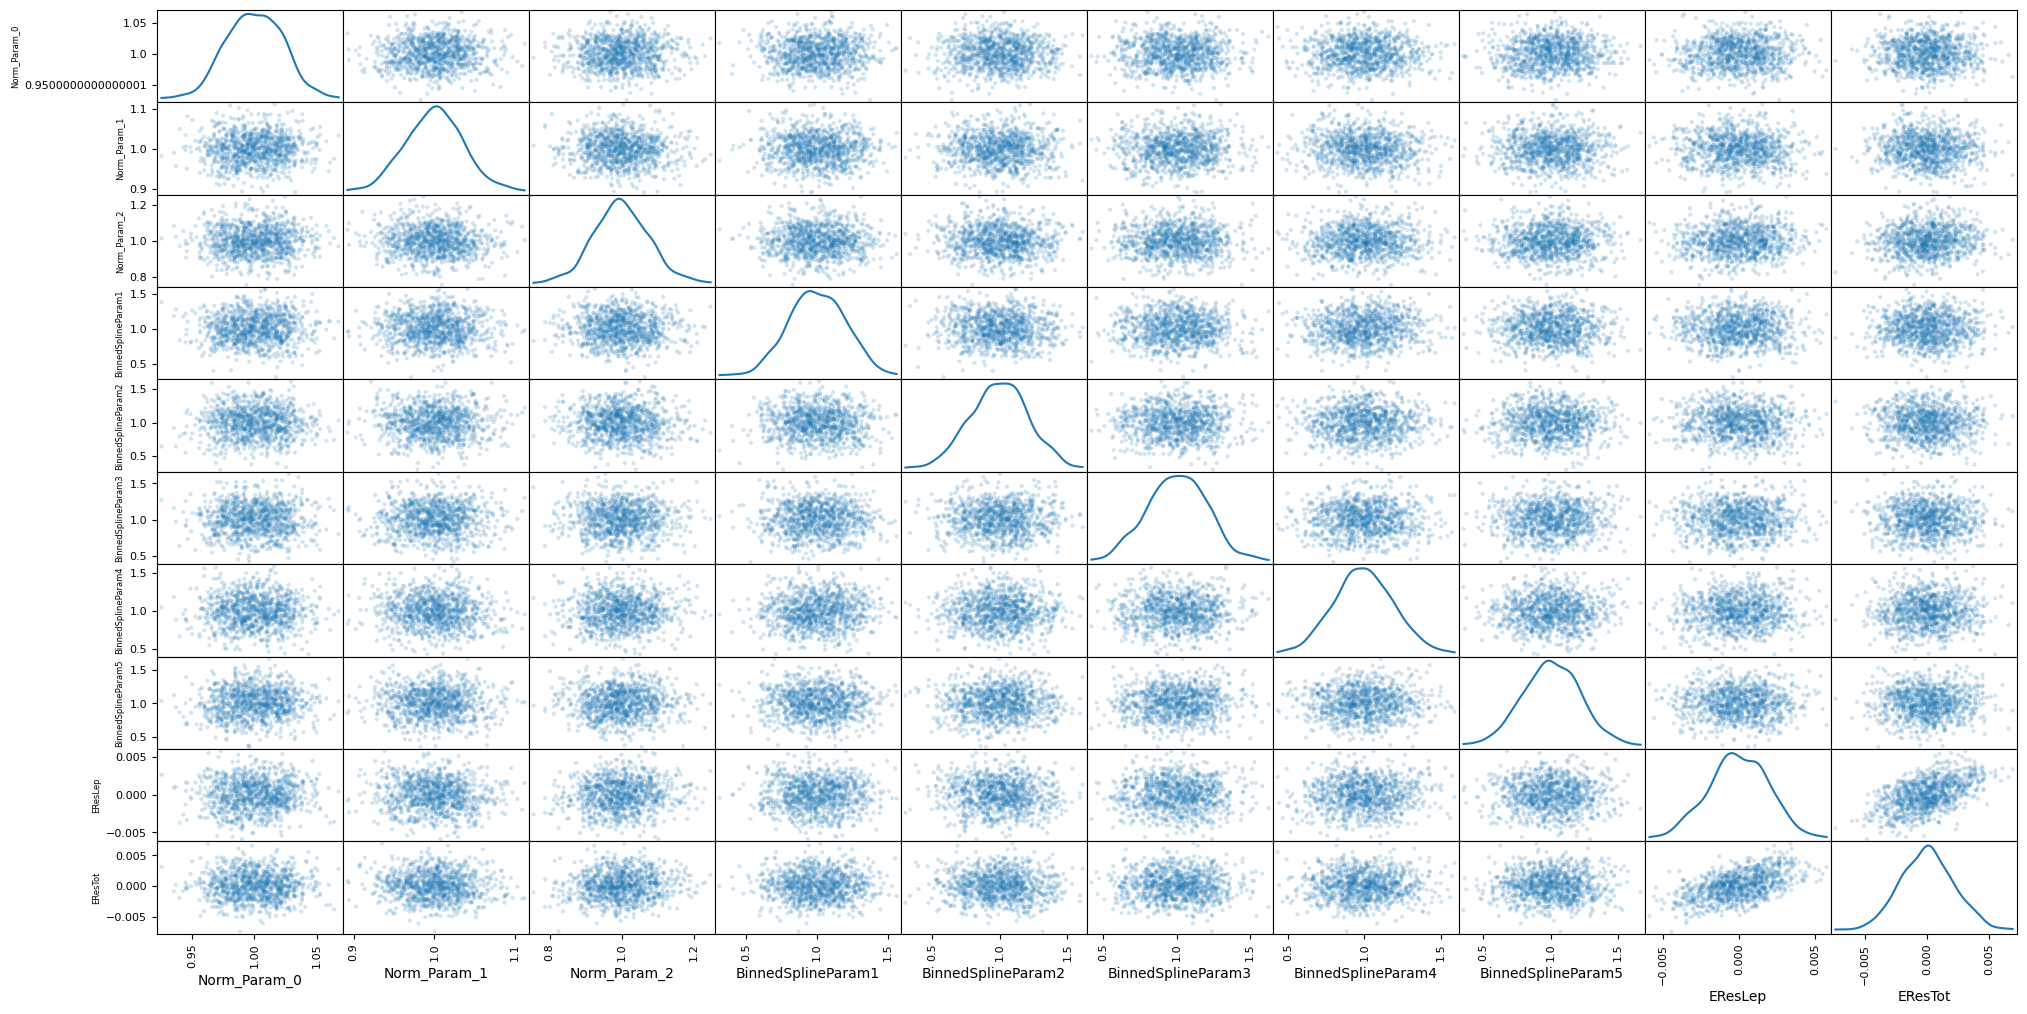

In [5]:
# Plot a scatter matrix of the parameters
Axes = pd.plotting.scatter_matrix(parameters_df, alpha=0.2, figsize=(24,12), diagonal='kde')

# This just makes the y-axis labels somewheat readable (or at least not terribly overlapping)
[plt.setp(item.yaxis.get_label(), 'size', 6) for item in Axes.ravel()]

# Let's show the plot!
plt.show()

As you can see, this all looks perfectly sensible and you can even see the inbuild prior correlations between some parameters.

We can now move on to creating a sample handler object.

# Sample Handler example

We will create a sample handler object and produce some spectra from a few toys we threw.

In [6]:
sample_handler = m3.samples.SampleHandlerTutorial(str("../TutorialConfigs/Samples/SampleHandler_Tutorial.yaml"), parameter_handler)

[2025-10-23 11:02:38.830] [info] [SampleHandlerFD.cpp:13] -------------------------------------------------------------------
[2025-10-23 11:02:38.830] [info] [SampleHandlerFD.cpp:14] Creating SampleHandlerFD object
[Monitor.cpp][info] ##################################
[Monitor.cpp][info] Welcome to:  
[Monitor.cpp][info]   __  __        _____ _     ____  
[Monitor.cpp][info]  |  \/  |      / ____| |   |___ \ 
[Monitor.cpp][info]  | \  / | __ _| |    | |__   __) |
[Monitor.cpp][info]  | |\/| |/ _` | |    | '_ \ |__ < 
[Monitor.cpp][info]  | |  | | (_| | |____| | | |___) |
[Monitor.cpp][info]  |_|  |_|\__,_|\_____|_| |_|____/ 
[Monitor.cpp][info] Version: 2.2.3
[Monitor.cpp][info] ##################################
[Monitor.cpp][info] Using following CPU:
[Monitor.cpp][info] model name	: Intel(R) Xeon(R) Gold 6230 CPU @ 2.10GHz
[Monitor.cpp][info] cpu MHz		: 2099.998
[Monitor.cpp][info] Architecture:                            x86_64
[Monitor.cpp][info] L1d cache:                      

sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: _module_raw: line 1: syntax error: unexpected end of file
sh: error importing function definition for `_module_raw'
sh: ml: line 1: syntax error: unexpected end of file
sh: error importing function definition for `ml'
sh: which: line 1: syntax error: unexpected end of file
sh: error importing function definition for `which'
sh: module: line 1: syntax error: unexpected end of file
sh: error importing function definition for `module'
sh: scl: line 1: syntax error: unexpected end of file
sh: error importing function definition for `scl'
sh: _module_raw: line 1: syntax 

As you can see we've now create a sample handler object and you can see the usual C++ stdout from MaCh3. We can now produce a histogram of the MC prediction from MaCh3.

Number of non-zero entries in MC prediction: 15


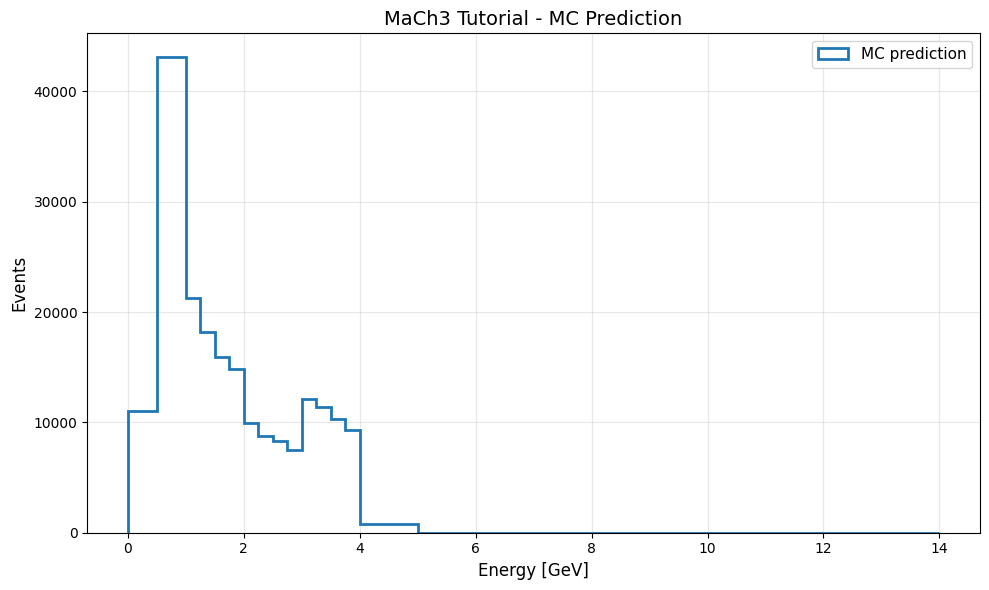

In [7]:
sample_handler.reweight()
mc_prediction, bin_edges = sample_handler.get_mc_hist(1)

# count the number of non-zero entries in the MC prediction
non_zero_entries = np.count_nonzero(mc_prediction)
print(f"Number of non-zero entries in MC prediction: {non_zero_entries}")

#Now pass this to matplotlib to draw a histogram
plt.figure(figsize=(10, 6))
plt.hist(bin_edges[:-1], bins=bin_edges, weights=mc_prediction, histtype='step', 
         linewidth=2, label="MC prediction")
plt.xlabel("Energy [GeV]", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.title("MaCh3 Tutorial - MC Prediction", fontsize=14)
plt.tight_layout()
plt.show()

Finally, let's bring the two bits of code together and produce many spectra from the sample handler from the parameter handler throws we previously made.

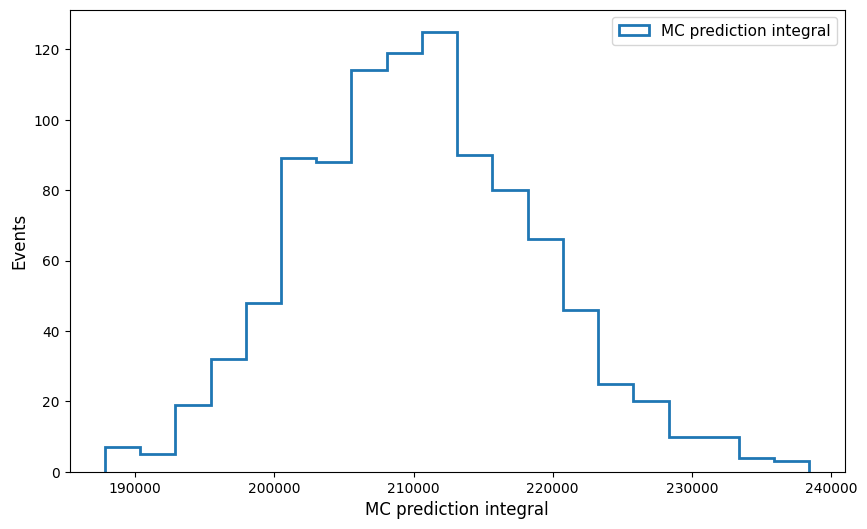

In [10]:
# Produce many spectra using the parameter values in the parameters_df
mc_prediction_integral = np.zeros(n_toys)

for toy in range(n_toys):
    # Set the parameter values from the dataframe
    parameter_handler.set_parameters(parameters_df.iloc[toy].values)
    # Re-weight the sample handler
    sample_handler.reweight()
    # Get the MC prediction and integrate it
    mc_prediction, _ = sample_handler.get_mc_hist(1)
    mc_prediction_integral[toy] = np.sum(mc_prediction)

# Plot the integrals of the MC predictions
plt.figure(figsize=(10, 6))
plt.hist(mc_prediction_integral, bins=20, histtype='step', 
         linewidth=2, label="MC prediction integral")
plt.xlabel("MC prediction integral", fontsize=12)
plt.ylabel("Events", fontsize=12)
plt.legend(fontsize=11)

And just like that we have a prior uncertainty on the total number of events in our prediction. This is a very simple example but it might inspire more complicated python scripts.